<a href="https://colab.research.google.com/github/dzhdanov-ex/ex14/blob/main/HW1_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Данные

Вам предлагается использовать в качестве датасета списки размещения Airbnb в любом понравившимся вам городе.

Информация о наборе данных и загрузка: http://insideairbnb.com/get-the-data.html

Датасет содержит следующие атрибуты:

* id: Уникальный идентификатор объявления.

* name: Название объявления.

* host_id: Уникальный идентификатор хозяина.

* host_name: Имя хозяина.

* neighbourhood_group: Группа районов.

* neighbourhood: Название района.

* latitude: Широта местоположения жилья.

* longitude: Долгота местоположения жилья.

* room_type: Тип комнаты (например, "Отдельная комната" или "Жилье целиком").

* price: Цена за ночь в евро.

* minimum_nights: Минимальное количество ночей, которое необходимо забронировать.

* number_of_reviews: Общее количество отзывов.

* last_review: Дата последнего отзыва.

* reviews_per_month: Среднее количество отзывов в месяц.

* calculated_host_listings_count: Общее количество объявлений хозяина.

* availability_365: Количество доступных дней для бронирования в течение следующих 365 дней.

* number_of_reviews_ltm: Количество отзывов за последние 12 месяцев. Показывает активность объекта размещения за последний год.

* licence: Номер лицензии объекта размещения. Указывает на наличие лицензии у хозяина для предоставления услуг сдачи жилья. Может содержать пропущенные значения, если лицензия не предоставлена или не требуется.

In [ ]:
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<ipython-input-302-7b4fc786e6d6>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


## Задание 1: Загрузка и чтение данных

Загрузите набор данных с сайта Inside Airbnb: http://insideairbnb.com/get-the-data.html. Выберите файл "listings.csv" для города, который Вам приглянулся. Для удобства проверки укажите в комментарии выбранный город.


In [ ]:
#Амстердам

data = pd.read_csv("/content/listings.csv")
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,322,2023-02-28,1.90,1,44,37,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,143,3,248,2023-02-26,1.82,1,14,20,0363 974D 4986 7411 88D8


## Задание 2: Предобработка данных

* Изучите данные в таблице (describe, info)

* Удалите столбец last_review, а также столбцы типа id и name. Почему их требуется удалять?

In [ ]:
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.998000e+03,6.998000e+03,0.0,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6316.000000,6998.000000,6998.000000,6998.000000
mean,1.868001e+17,1.001616e+08,NaN,52.366767,4.890218,223.038868,4.157188,48.557445,1.134069,1.806516,71.658045,12.373821
std,3.138377e+17,1.356648e+08,NaN,0.017055,0.035085,181.018460,19.356066,104.420518,2.396285,2.474394,101.903298,35.278613
min,2.818000e+03,3.159000e+03,NaN,52.290340,4.755710,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.578534e+07,9.506638e+06,NaN,52.355979,4.866687,130.000000,2.000000,3.000000,0.270000,1.000000,0.000000,0.000000
50%,3.534389e+07,3.403882e+07,NaN,52.366065,4.888160,186.000000,3.000000,12.000000,0.530000,1.000000,15.000000,4.000000
75%,5.821187e+17,1.354875e+08,NaN,52.376540,4.908185,270.000000,4.000000,43.000000,1.170000,1.000000,113.000000,9.000000
max,8.427546e+17,5.044487e+08,NaN,52.425120,5.026430,7900.000000,1001.000000,2310.000000,111.590000,22.000000,365.000000,1637.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6998 non-null   int64  
 1   name                            6998 non-null   object 
 2   host_id                         6998 non-null   int64  
 3   host_name                       6998 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6998 non-null   object 
 6   latitude                        6998 non-null   float64
 7   longitude                       6998 non-null   float64
 8   room_type                       6998 non-null   object 
 9   price                           6998 non-null   int64  
 10  minimum_nights                  6998 non-null   int64  
 11  number_of_reviews               6998 non-null   int64  
 12  last_review                     63

id и name - не являются фичами для целевой переменной price, поэтому их нужно удалить. Это индефикаторы каждой записи. id - это уникальный индефикатор для каждого поля. Если каждому id сопоставить значение name и присвоить значению name, тот же id, то будет корреляция равная 1 между этими переменными, поэтому следовало бы удалить одну их них, так как между ними была бы зависимость.

Столбец last_review так же следовало бы удалить, так как он не информативен для прогнозирования целевой переменной price

In [ ]:
data = data.drop(columns=['id', 'name', 'last_review'])

In [ ]:
print("Итоговый датасет")
data.head(5)

Итоговый датасет


,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,322,1.90,1,44,37,0363 5F3A 5684 6750 D14D
1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,143,3,248,1.82,1,14,20,0363 974D 4986 7411 88D8
3,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,76,2,476,3.12,2,79,97,0363 607B EA74 0BD8 2F6F
4,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,56,2,618,4.23,2,69,85,0363 607B EA74 0BD8 2F6F


#### Пропущенные значения

* Исследуйте пропущенные значения в наборе данных. Определите столбцы с большим количеством пропущенных значений.

* Подумайте, на что можно заменить пропущенные значения в столбце reviews_per_month

* Удалите столбцы с большим количеством пропущенных данных

In [ ]:
print("Процент пропущенных значений в каждом столбце, %")
print("\t")
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Процент пропущенных значений в каждом столбце, %
	
host_id - 0%
host_name - 0%
neighbourhood_group - 100%
neighbourhood - 0%
latitude - 0%
longitude - 0%
room_type - 0%
price - 0%
minimum_nights - 0%
number_of_reviews - 0%
reviews_per_month - 10%
calculated_host_listings_count - 0%
availability_365 - 0%
number_of_reviews_ltm - 0%
license - 0%


<Axes: >

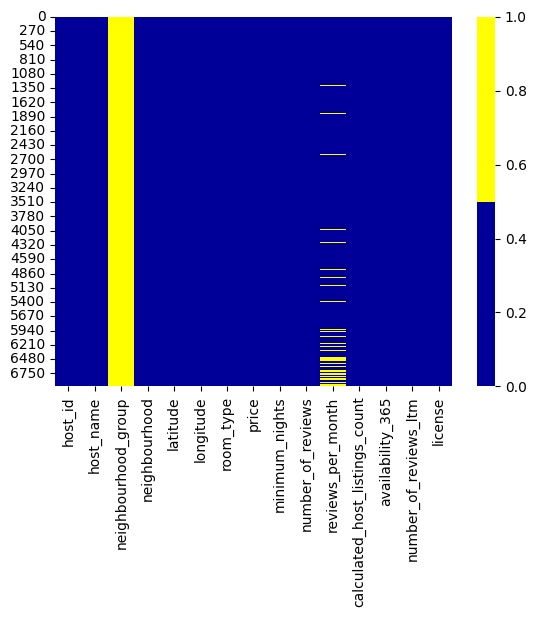

In [ ]:
cols = data.columns[:]
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

Здесь мы видим, что только два столбца содержат пустые значения: neighborhood_group и reviews_per_month

Столбец просто отбросим neighborhood_group, так как он весь пустой

In [ ]:
data = data.drop('neighbourhood_group', axis=1)

In [ ]:
data.head(5)

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,322,1.90,1,44,37,0363 5F3A 5684 6750 D14D
1,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,97647,Flip,Centrum-West,52.38761,4.89188,Private room,143,3,248,1.82,1,14,20,0363 974D 4986 7411 88D8
3,124245,Edwin,Centrum-West,52.36775,4.89092,Private room,76,2,476,3.12,2,79,97,0363 607B EA74 0BD8 2F6F
4,124245,Edwin,Centrum-Oost,52.36584,4.89111,Private room,56,2,618,4.23,2,69,85,0363 607B EA74 0BD8 2F6F


<Axes: >

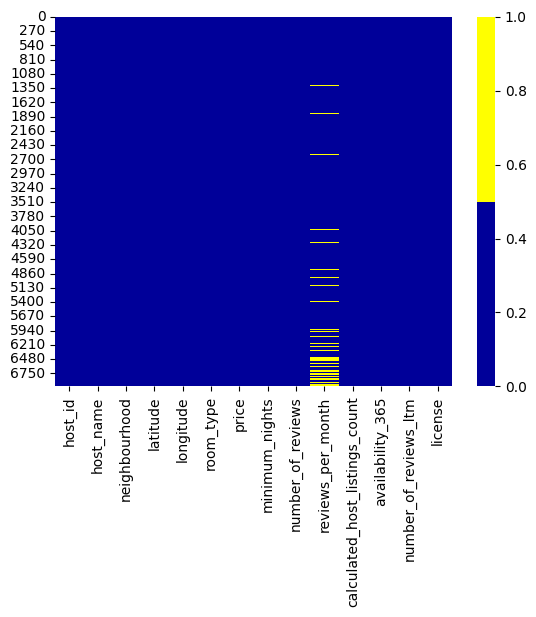

In [ ]:
cols = data.columns[:]
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

В столбце reviews_per_month заменим пустые значения на медианное значение столбца

In [ ]:
median_value = data.reviews_per_month.median()
median_value

0.53

In [ ]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(median_value)

<Axes: >

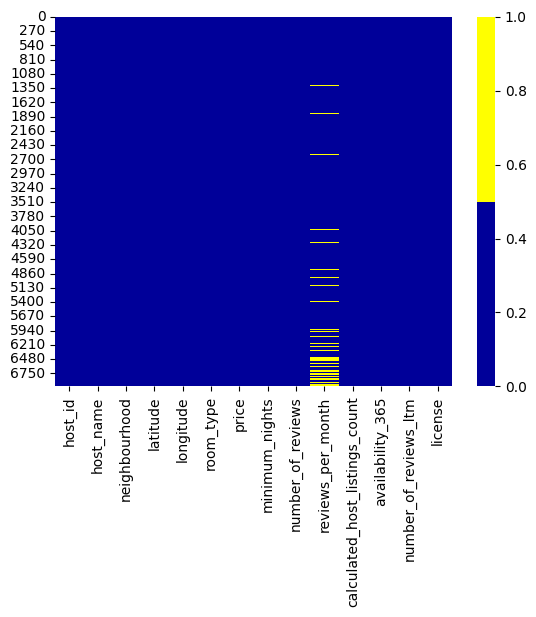

In [ ]:
cols = data.columns[:]
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

#### Выбросы

Визуализируйте распределения числовых столбцов, таких как 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' и 'availability_365', используя графики ящика с усами (boxplots) или гистограммы.

<Axes: >

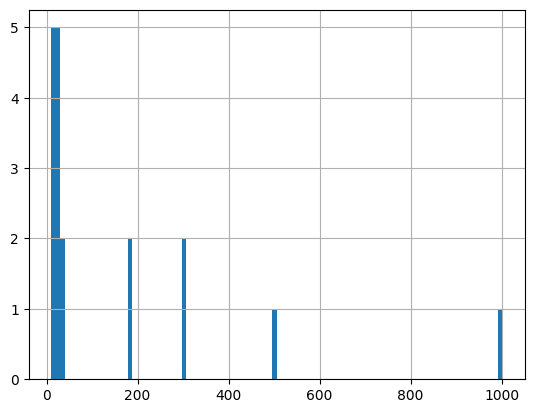

In [ ]:
data['minimum_nights'].hist(bins=100)

<Axes: >

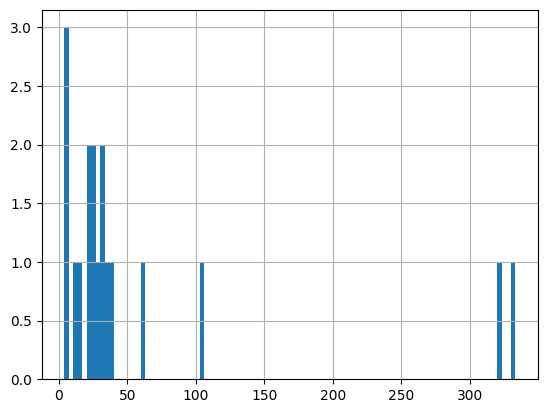

In [ ]:
data['number_of_reviews'].hist(bins=100)

<Axes: >

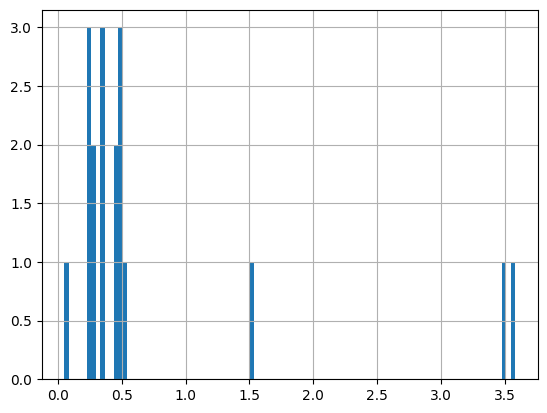

In [ ]:
data['reviews_per_month'].hist(bins=100)

<Axes: >

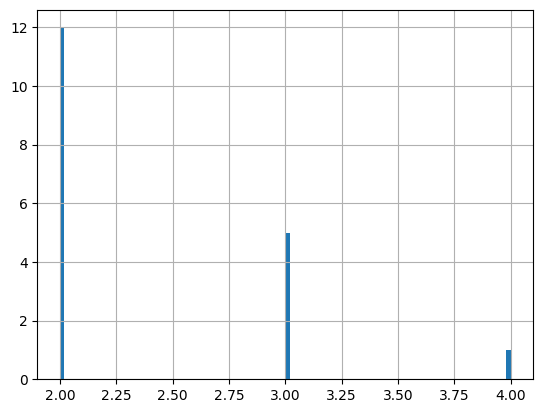

In [ ]:
data['calculated_host_listings_count'].hist(bins=100)

<Axes: >

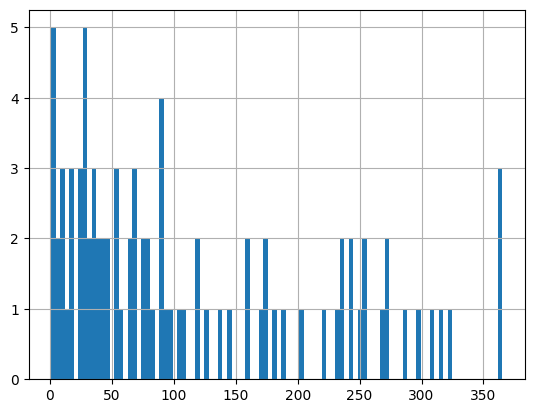

In [ ]:
data['availability_365'].hist(bins=100)

<Axes: >

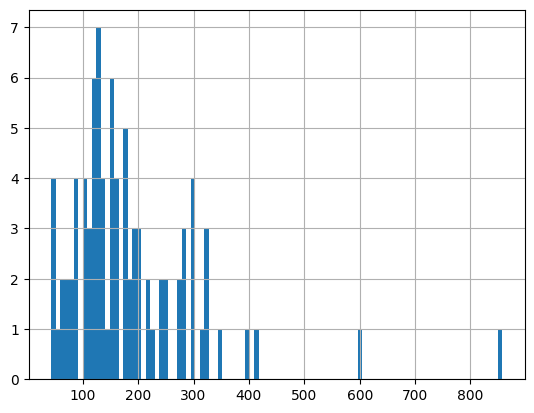

In [ ]:
data['price'].hist(bins=100)

Мы видим, что во всех столбцах, кроме price, есть выбросы, от которых нужно избавиться таким же методом, как и при замене пустых значений

In [ ]:
print("2, 3, 1 - выбросы")
data['minimum_nights'].value_counts()

2, 3, 1 - выбросы


2       2142
3       1910
1       1160
4        656
5        454
7        278
6        123
10        49
14        47
28        26
21        23
30        23
20        16
15        14
12        11
8          8
9          6
300        4
25         4
180        4
60         4
13         3
31         3
26         3
100        3
90         2
18         2
11         2
17         1
50         1
183        1
16         1
84         1
29         1
75         1
93         1
45         1
120        1
27         1
200        1
500        1
1001       1
22         1
800        1
150        1
91         1
Name: minimum_nights, dtype: int64

Заменим просто на медианное значение в столбце

In [ ]:
median_value = data.minimum_nights.median()
data['minimum_nights'] = data['minimum_nights'].replace(2, int(median_value))
data['minimum_nights'] = data['minimum_nights'].replace(3, int(median_value))
data['minimum_nights'] = data['minimum_nights'].replace(1, int(median_value))
data['minimum_nights']

0       3
1       3
2       3
3       3
4       3
       ..
6993    3
6994    3
6995    3
6996    3
6997    3
Name: minimum_nights, Length: 6998, dtype: int64

In [ ]:
print('Избавились от выбросов')
data['minimum_nights'].value_counts()

Избавились от выбросов


14      21
10      20
28      15
21       8
30       7
20       7
12       7
15       5
300      4
8        3
26       3
180      2
60       2
18       2
9        2
25       2
100      2
13       2
183      1
11       1
84       1
29       1
31       1
800      1
500      1
1001     1
150      1
45       1
93       1
91       1
50       1
Name: minimum_nights, dtype: int64

In [ ]:
for item in range(3, 8):
  data.drop(data.index[data['minimum_nights'] == item], inplace = True)

In [ ]:
data['minimum_nights'].value_counts()

14      14
28      12
10      12
30       7
12       5
300      4
15       4
21       3
20       3
9        2
18       2
180      2
8        2
25       1
1001     1
84       1
29       1
60       1
13       1
11       1
500      1
91       1
100      1
150      1
45       1
26       1
800      1
93       1
183      1
Name: minimum_nights, dtype: int64

In [ ]:
for item in range(4, 6):
  data.drop(data.index[data['minimum_nights'] == item], inplace = True)

In [ ]:
data['number_of_reviews'].value_counts()

6      7
13     7
5      5
9      5
7      3
4      3
23     3
17     3
40     3
37     2
14     2
20     2
45     2
12     2
18     2
27     2
25     2
41     2
28     2
54     1
143    1
32     1
55     1
103    1
24     1
36     1
121    1
31     1
15     1
11     1
333    1
34     1
91     1
148    1
63     1
73     1
88     1
90     1
33     1
46     1
58     1
59     1
22     1
16     1
82     1
321    1
61     1
19     1
Name: number_of_reviews, dtype: int64

In [ ]:
for item in range(1, 4):
  data.drop(data.index[data['number_of_reviews'] == item], inplace = True)

In [ ]:
data['availability_365'].value_counts()

0      594
1       33
2       29
3       25
7       21
      ... 
220      1
112      1
200      1
253      1
119      1
Name: availability_365, Length: 255, dtype: int64

In [ ]:
data.drop(data.index[data['availability_365'] == 0], inplace = True)
data['availability_365'].value_counts()

1      33
2      29
3      25
7      21
5      20
       ..
220     1
112     1
200     1
253     1
119     1
Name: availability_365, Length: 254, dtype: int64

In [ ]:
data['calculated_host_listings_count'].value_counts()
data.drop(data.index[data['calculated_host_listings_count'] == 1], inplace = True)
data['calculated_host_listings_count'].value_counts()

2    12
3     5
4     1
Name: calculated_host_listings_count, dtype: int64

In [ ]:
data.head()

,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_city_center_km
40,856540,Pierre,6,1,400,21,32,0.23,2,107,3,0363 1C26 67B4 C610 1758,9.80
212,1406783,Alicia,15,1,87,30,63,0.49,2,244,0,Exempt,9.76
358,8982547,Martine,4,1,600,300,28,0.25,2,364,0,0363 7C32 C932 83D2 F5D8,9.75
998,11225917,Flávio,11,2,45,180,333,3.58,2,11,0,Exempt,9.90
1016,11225917,Flávio,11,2,45,180,321,3.48,2,144,0,Exempt,9.90


In [ ]:
print("Процент пропущенных значений в каждом столбце, %")
print("\t")
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Процент пропущенных значений в каждом столбце, %
	
host_id - 0%
host_name - 0%
neighbourhood - 0%
room_type - 0%
price - 0%
minimum_nights - 0%
number_of_reviews - 0%
reviews_per_month - 0%
calculated_host_listings_count - 0%
availability_365 - 0%
number_of_reviews_ltm - 0%
license - 0%
distance_to_city_center_km - 0%


#### Визуализация данных

* Придумайте и постройте как минимум 6 содержательных визуализаций, которые помогут сделать те или иные выводы

* К каждой визуализации должна прилагаться содержательная текстовая интерпретация

1. Зависимость среднего количества отзывов в месяц к цене за ночь в евро. Может ли
повлиять накрутка отзывов на стоимость жилья?
2. Сколько объявлений в среднем выкладывают на рынке (гистограмма с чертой)
3. Зависимость района к минимальному количеству ночей, которое необходимо забронировать. В каком районе следует расположить отель, чтобы получать больше клиентов.
4. Гистограмма по типу жилья. Чего больше всего на рынке -> если чего-то меньше, то
можно посчитать общую выручку, которое приносит этот тип жилья на рынке и понять можем
ли мы занять долю на этом рынке при условии, что он не консолидорован, то есть нет
конкурентов с долей (>20%)
5. Зависимость количества выложенных объявлений на количество отзывов: может ли хозяин жилья выложить как больше оптимизированных объявлений для привлечения бесплатного трафика
6. Гистограмма цен. Какая средняя цена на рынке

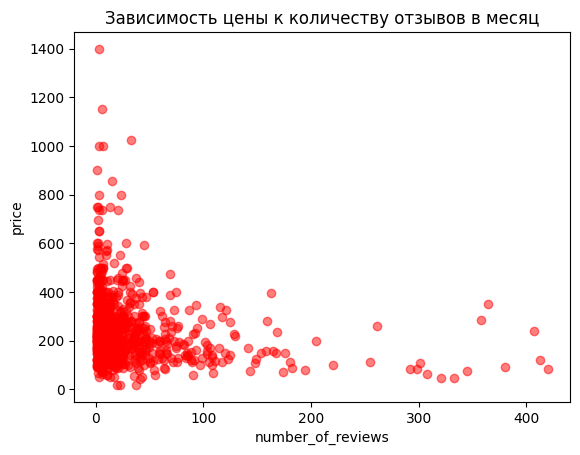

In [ ]:
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.title("Зависимость цены к количеству отзывов в месяц")
plt.scatter(data['number_of_reviews'], data['price'], c='red', alpha=0.5)
plt.show()

Вывод: при количесте отзывов до 100 самая высокая цена

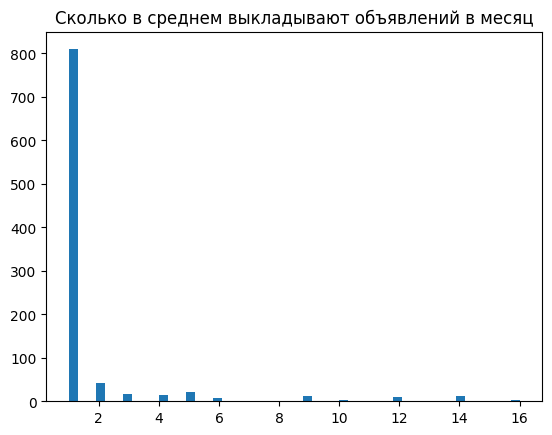

In [ ]:
plt.hist(data['calculated_host_listings_count'], bins=50)
plt.title("Сколько в среднем выкладывают объявлений в месяц")
plt.show()

Вывод: по гистограмме можно увидеть, что в среднем количество объявлений варьируется от 500 до 1000

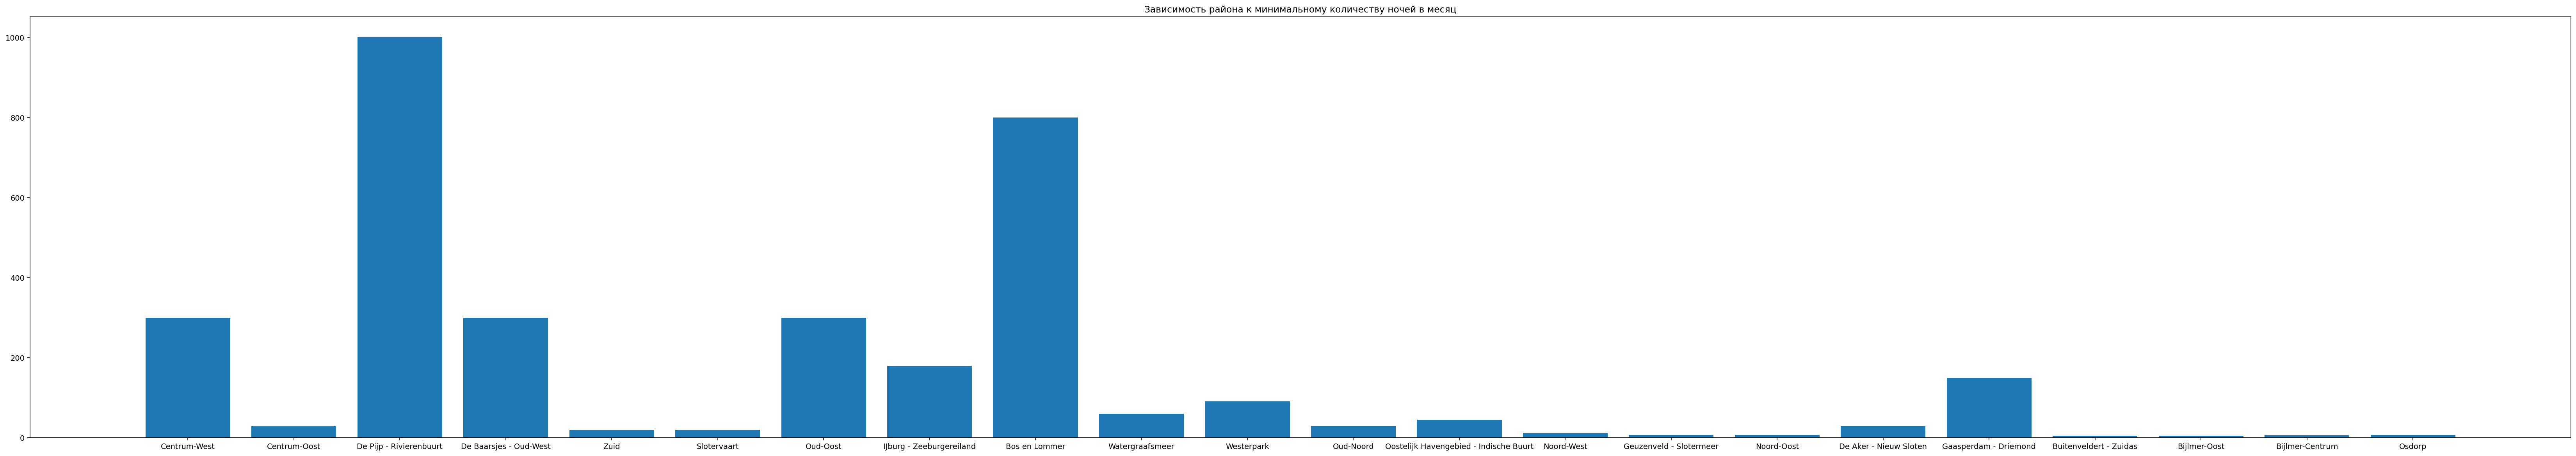

In [ ]:
figure(figsize=(60, 10), dpi=140)
plt.bar(data['neighbourhood'], data['minimum_nights'])
plt.title("Зависимость района к минимальному количеству ночей в месяц")
plt.show()

Вывод: в районе De Pijp и Bos en Lommer преобладающее количество минимального количества ночей

Text(0.5, 1.0, 'Тип жилья')

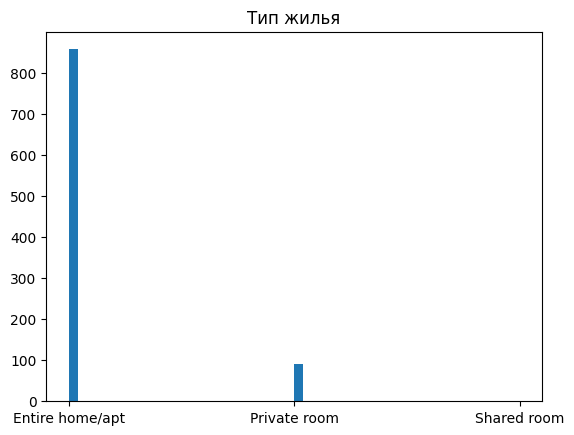

In [ ]:
plt.hist(data['room_type'], bins=50)
plt.title("Тип жилья")

Вывод очевидный, что самый частый тип жилья - Entire home/apt

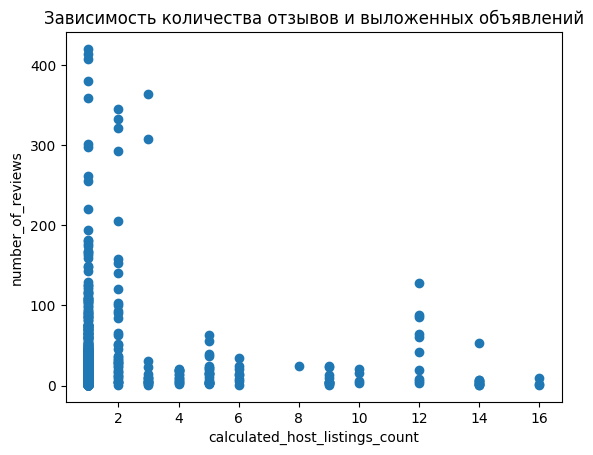

In [ ]:
plt.xlabel('calculated_host_listings_count')
plt.ylabel('number_of_reviews')
plt.scatter(data['calculated_host_listings_count'], data['number_of_reviews'])
plt.title("Зависимость количества отзывов и выложенных объявлений")
plt.show()

Вывод: при количестве объявлений от 1 до 4 самое большое количество отзывов

Text(0.5, 1.0, 'Цены на рынке')

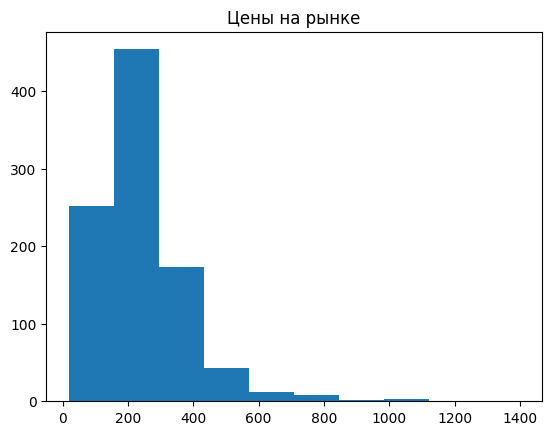

In [ ]:
plt.hist(data['price'])
plt.title("Цены на рынке")

Вывод: средняя цена на рынке от 200 до 400

## Задание 3: Создание новых признаков
* Создайте признак 'distance_to_city_center_km', который вычисляет расстояние от каждого объекта размещения до центра города.

* Удалите лишние столбцы после создания признака

In [ ]:
#Центр города (широта, долгота)
center_city_radians = ((data['latitude'].sum()/data['latitude'].count()), (data['longitude'].sum()/data['longitude'].count()))
center_city_radians

(52.36564581402266, 4.8918740452170475)

In [ ]:
data['latitude'] = round(data['latitude'], 2)
data['longitude'] = round(data['longitude'], 2)

#Центр города (широта, долгота)
center_city_radians = (data['latitude'].median(), data['longitude'].median())
center_city_radians

(52.36, 4.89)

In [ ]:
from math import *

data['distance_to_city_center_km'] = center_city_radians[0]-data['latitude'] + center_city_radians[1]+data['longitude']

data

,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_city_center_km
6,1600010,Anke & Robert,Centrum-West,52.37,4.88,Entire home/apt,325,5,87,0.66,1,346,3,0363 59D8 7D30 6CFA DC81,9.76
9,230246,Donald,Centrum-Oost,52.37,4.93,Entire home/apt,395,4,163,1.08,1,341,0,0363 7F3D 0BAE 28C8 C7D2,9.81
39,1853421,Marijn,Centrum-Oost,52.36,4.90,Entire home/apt,214,5,15,0.16,1,45,4,0363 1761 5C93 2C93 93FE,9.79
40,856540,Pierre,De Pijp - Rivierenbuurt,52.34,4.89,Entire home/apt,400,21,32,0.23,2,107,3,0363 1C26 67B4 C610 1758,9.80
43,1901477,Caroline,Centrum-Oost,52.37,4.90,Entire home/apt,337,4,115,0.90,1,41,5,0363 0D10 7FFD B425 1553,9.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,32401932,Pleunie,De Baarsjes - Oud-West,52.36,4.86,Entire home/apt,102,7,1,1.00,1,68,1,0363 55DD 845C 90CD 9DDB,9.75
6767,5857491,Sanne,De Pijp - Rivierenbuurt,52.35,4.90,Entire home/apt,575,5,1,0.65,1,92,1,0363 D420 6081 FF65 923C,9.80
6834,78611193,Myrthe,De Baarsjes - Oud-West,52.37,4.87,Entire home/apt,210,4,1,1.00,1,41,1,0363706FA801CA01E8B1,9.75
6842,27837566,Juliette,Watergraafsmeer,52.35,4.93,Entire home/apt,168,6,1,1.00,1,1,1,0363 2EA2 64D0 F437 8197,9.83


In [ ]:
#Удаление столбцов

data = data.drop(columns=['latitude', 'longitude'])

In [ ]:
data['room_type'] = data['room_type'].replace('Entire home/apt', 1)
data['room_type'] = data['room_type'].replace('Private room', 2)
data['room_type'] = data['room_type'].replace('Shared room', 3)

#### Категориальные признаки

* Рассмотрите описательные характеристики для категориальных признаков, сделайте выводы (используйте value_counts)

In [ ]:
data['neighbourhood'].value_counts()

De Pijp - Rivierenbuurt                   137
De Baarsjes - Oud-West                    137
Centrum-West                              110
Centrum-Oost                               97
Zuid                                       68
Oud-Oost                                   60
Westerpark                                 56
Bos en Lommer                              50
Watergraafsmeer                            40
Oud-Noord                                  33
IJburg - Zeeburgereiland                   33
Oostelijk Havengebied - Indische Buurt     28
Noord-West                                 28
Slotervaart                                22
Geuzenveld - Slotermeer                    12
Noord-Oost                                 10
De Aker - Nieuw Sloten                      8
Gaasperdam - Driemond                       7
Bijlmer-Centrum                             5
Buitenveldert - Zuidas                      3
Bijlmer-Oost                                3
Osdorp                            

In [ ]:
array_unique_value = data['neighbourhood'].unique()
array_unique_value

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25])

In [ ]:
count_step = 4

for item in array_unique_value:
  data['neighbourhood'] = data['neighbourhood'].replace(item, count_step)
  count_step += 1

Вывод:

De Pijp - Rivierenbuurt

De Baarsjes - Oud-West  - самые часто встречающееся значения

In [ ]:
data['host_name'].value_counts()

Remco            11
Wittenberg       11
Maarten           8
Dutch Masters     8
Gijs              7
                 ..
Vera              1
Magda             1
Rosalie           1
Cor               1
Juliette          1
Name: host_name, Length: 642, dtype: int64

Вывод:

Remco
Wittenberg - самые часто встречающееся значения

In [ ]:
data['room_type'].value_counts()

Entire home/apt    857
Private room        91
Shared room          1
Name: room_type, dtype: int64

Вывод: Entire home/apt - самое часто встречающееся значение

### Задание 4. Обучение модели

Обучите линейную модель предсказывать стоимость жилья (целевая переменная - price)

* Разбейте dataframe на X и y

* Разбейте выборку на данные для тренировки и тестовые

* Обучите модель, проверьте точность

In [ ]:
data

,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_city_center_km
40,856540,Pierre,6,1,400,21,32,0.23,2,107,3,0363 1C26 67B4 C610 1758,9.80
212,1406783,Alicia,15,1,87,30,63,0.49,2,244,0,Exempt,9.76
358,8982547,Martine,4,1,600,300,28,0.25,2,364,0,0363 7C32 C932 83D2 F5D8,9.75
998,11225917,Flávio,11,2,45,180,333,3.58,2,11,0,Exempt,9.90
1016,11225917,Flávio,11,2,45,180,321,3.48,2,144,0,Exempt,9.90
1579,4142666,Florian,4,1,320,28,23,0.29,3,45,9,0363 A3A5 3E2D 442F F9BC,9.76
1686,4142666,Florian,4,1,320,28,4,0.05,3,234,1,036395BA26C76214DD8D,9.75
1710,19094953,Sharon,8,1,280,14,27,0.35,2,58,1,0363 7901 99B5 94B7 5542,9.75
1749,6906435,Agnes,14,1,230,28,37,0.50,2,3,6,0363 ECCD 1521 DFA9 4A51,9.74
1840,19094953,Sharon,8,1,280,15,23,0.35,2,54,1,0363 7901 99B5 94B7 5542,9.76


In [ ]:
X = data.drop(columns=['price', 'host_id', 'host_name', 'license'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_new = LinearRegression().fit(X_train, y_train)
y_pred = model_new.predict(X_test)


print(round(model_new.score(X_train, y_train), 2))

0.88


### Задание 5. Улучшение качества прогнозирования

Подумайте, каким образом можно улучшить качество модели:

* Попробуйте использовать различные признаки (убирать часть столбцов из dataframe)

* Попробуйте другие модели (regressors) из библиотеки sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Сделайте выводы

room_type и number_of_reviews имеют кк близкий к 1, поэтому можно одно значение оставить, а другое удалить

<ipython-input-412-c16a3cab7a83>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: title={'center': 'Correlation between dataset variables'}>

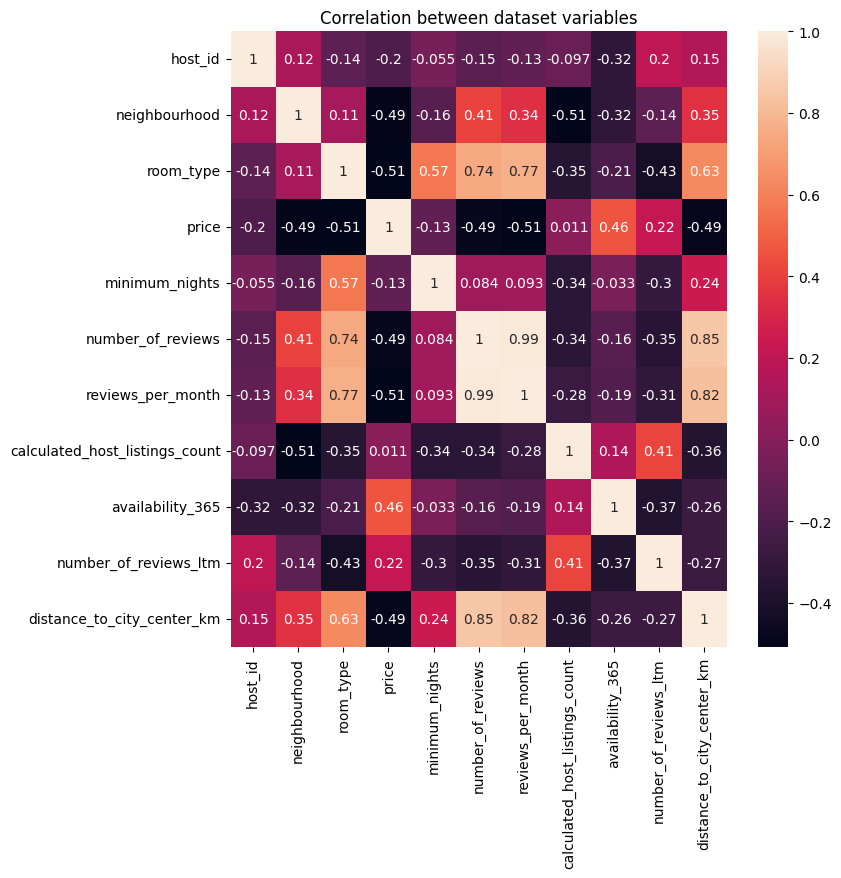

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Correlation between dataset variables')
sns.heatmap(data.corr(), annot=True)

In [ ]:
X = data.drop(columns=['price', 'host_id', 'host_name', 'license', 'room_type'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_new = LinearRegression().fit(X_train, y_train)
y_pred = model_new.predict(X_test)


print(round(model_new.score(X_train, y_train), 2))

0.93
